# FIFA data feature engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("fifa.csv")
data.shape

(18207, 89)

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data['Joined'].isnull().sum()

1553

> can i delete the missing values row or fill the missing values with mode . which is better option in joined case

To determine whether to delete the rows with missing values or fill them with the mode, we need to understand the distribution of the 'Joined' column and the impact of missing values on the dataset.

Let's first check the mode of the 'Joined' column and see how frequently it occurs. Then, we can decide whether filling the missing values with the mode is a reasonable

In [ ]:
# Checking the mode of the 'Joined' column
joined_mode = data['Joined'].mode()[0]
joined_mode

'Jul 1, 2018'

The mode of the 'Joined' column is 'Jul 1, 2018'. Now, let's see how frequently this mode occurs in the

In [ ]:
data['Joined'].value_counts().loc['Jul 1, 2018']

1538

In [ ]:
missing_percentage = (data['Joined'].isnull().sum() / len(data)) * 100
missing_percentage

8.529686384357664

Approximately 8.53% of the rows have missing values in the 'Joined' column. 

Given this information:
1. Filling the missing values with the mode ('Jul 1, 2018') would significantly increase the frequency of this date, which might not be ideal if the 'Joined' date is important for analysis.
2. Deleting 8.53% of the rows would reduce the dataset size but might be a better option if the 'Joined' date is crucial for your analysis and you want to avoid introducing bias.

If the 'Joined' date is not critical for your analysis, filling with the mode might be acceptable. Otherwise, deleting the rows might be a better option.

Now iam taking "Joined" as main analysis. so delete the rows

In [ ]:
data = data.dropna(subset=['Joined'])

In [ ]:
data['Joined'].isnull().sum()

0

In some cases data.Joined and data["Joined"] both are same

In [ ]:
# calculate the longest membership in the club

import datetime

now = datetime.datetime.now()

data["Joined_year"] = data['Joined'].apply(lambda x: x.split(",")[1].strip())
data["years_of_member"] = (data.Joined_year.apply(lambda x: now.year-int(x))).astype(int)

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_year,years_of_member
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2004,20
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2018,6
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2017,7
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2011,13
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2015,9


In [ ]:
membership = data[["Name","Joined_year","years_of_member"]].sort_values(by="years_of_member",ascending=False)
membership.set_index("Name", inplace=True)
membership

,Joined_year,years_of_member
Name,,
O. Pérez,1991,33
M. Ogasawara,1998,26
H. Sogahata,1998,26
M. Al Shalhoub,1998,26
S. Narazaki,1999,25
...,...,...
C. Carrillo,2018,6
F. Gino,2018,6
U. Jenssen,2018,6


In [ ]:
# creating new features by aggregating the features

data['defending'] = (data['Marking'] + data['StandingTackle'] + data['SlidingTackle']) / 3

data['general'] = (data['HeadingAccuracy'] + data['Dribbling'] + data['Curve'] + data['BallControl']) / 4

data['passing'] = (data['Crossing'] + data['ShortPassing'] + data['LongPassing']) / 3

data['power'] = (data['Acceleration'] + data['SprintSpeed'] + data['Agility'] + data['Reactions']) / 4

data['mentality'] = (data['Positioning'] + data['Vision'] + data['Composure'] + data['Penalties']) / 4

data['goalkeeping'] = (data['GKDiving'] + data['GKHandling'] + data['GKKicking'] + data['GKPositioning'] + data['GKReflexes']) / 5


/tmp/ipykernel_248/141755183.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['defending'])
/tmp/ipykernel_248/141755183.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['general'])
/tmp/ipykernel_248/141755183.py:10: UserWarning: 

`distplot` is a deprecated function and will be

<AxesSubplot: xlabel='goalkeeping', ylabel='Density'>

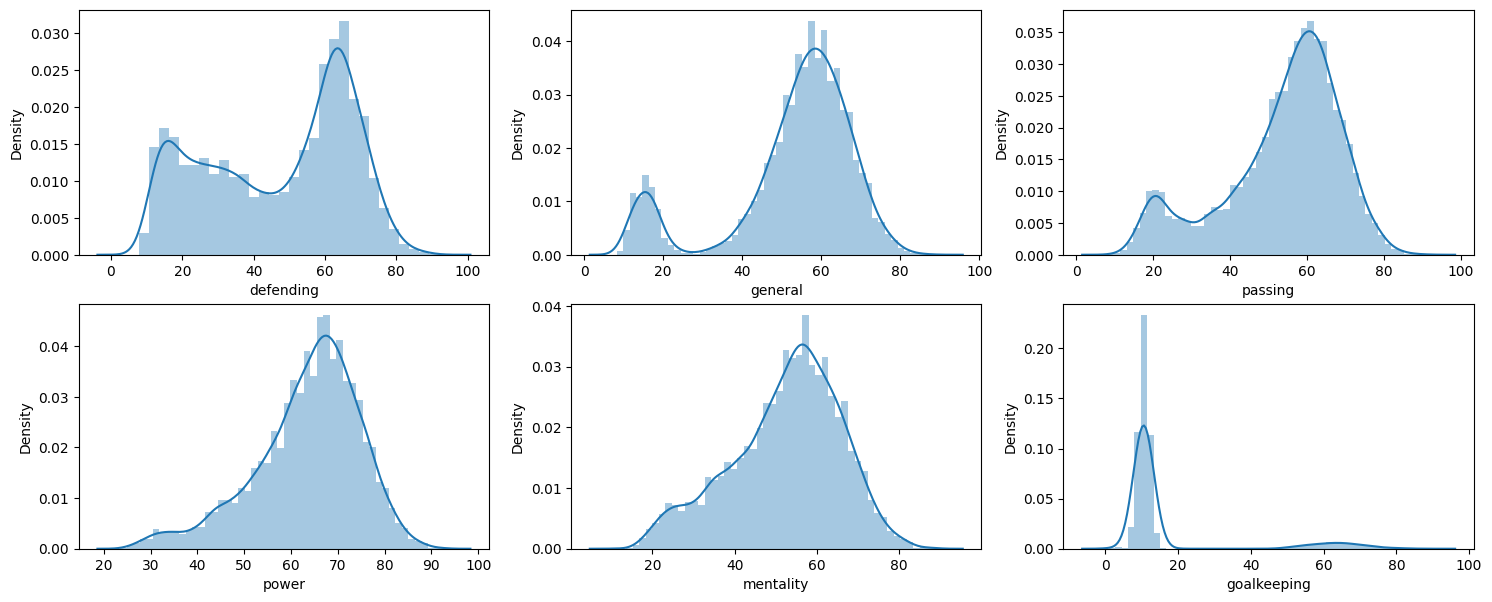

In [ ]:
plt.rcParams["figure.figsize"] = (18, 7)

plt.subplot(2,3,1)
sns.distplot(data['defending'])

plt.subplot(2,3,2)
sns.distplot(data['general'])

plt.subplot(2,3,3)
sns.distplot(data['passing'])

plt.subplot(2,3,4)
sns.distplot(data['power'])

plt.subplot(2,3,5)
sns.distplot(data['mentality'])

plt.subplot(2,3,6)
sns.distplot(data['goalkeeping'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f404f83-de41-42a0-af9d-afbc4f2e2f7f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>